# Modular Arithmetic: Theory and Applications

## Introduction

Modular arithmetic is a system of arithmetic for integers where numbers "wrap around" upon reaching a certain value, called the **modulus**. It forms the foundation of number theory and has extensive applications in cryptography, computer science, and pure mathematics.

## Fundamental Definitions

### Congruence Relation

Two integers $a$ and $b$ are said to be **congruent modulo $n$** if their difference is divisible by $n$. We write:

$$a \equiv b \pmod{n}$$

Formally, this means:

$$a \equiv b \pmod{n} \iff n \mid (a - b)$$

where $n \mid (a-b)$ denotes that $n$ divides $(a-b)$.

### Residue Classes

For a given modulus $n$, the integers partition into $n$ **residue classes**:

$$\mathbb{Z}/n\mathbb{Z} = \{[0], [1], [2], \ldots, [n-1]\}$$

where $[a] = \{x \in \mathbb{Z} : x \equiv a \pmod{n}\}$.

## Arithmetic Operations

### Addition and Multiplication

Modular arithmetic preserves the standard operations:

$$(a + b) \mod n = ((a \mod n) + (b \mod n)) \mod n$$

$$(a \cdot b) \mod n = ((a \mod n) \cdot (b \mod n)) \mod n$$

### Modular Exponentiation

For computing $a^k \mod n$ efficiently, we use the **binary exponentiation** algorithm:

$$a^k \mod n = \begin{cases}
1 & \text{if } k = 0 \\
(a^{k/2})^2 \mod n & \text{if } k \text{ is even} \\
a \cdot a^{k-1} \mod n & \text{if } k \text{ is odd}
\end{cases}$$

## Key Theorems

### Fermat's Little Theorem

If $p$ is prime and $\gcd(a, p) = 1$, then:

$$a^{p-1} \equiv 1 \pmod{p}$$

### Euler's Theorem

For any integer $a$ with $\gcd(a, n) = 1$:

$$a^{\phi(n)} \equiv 1 \pmod{n}$$

where $\phi(n)$ is **Euler's totient function**, counting integers from 1 to $n$ that are coprime to $n$:

$$\phi(n) = n \prod_{p \mid n} \left(1 - \frac{1}{p}\right)$$

### Chinese Remainder Theorem

If $n_1, n_2, \ldots, n_k$ are pairwise coprime, then the system:

$$\begin{cases}
x \equiv a_1 \pmod{n_1} \\
x \equiv a_2 \pmod{n_2} \\
\vdots \\
x \equiv a_k \pmod{n_k}
\end{cases}$$

has a unique solution modulo $N = n_1 \cdot n_2 \cdots n_k$.

## Computational Implementation

We now implement and visualize key concepts in modular arithmetic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd
from functools import reduce

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10

### Euler's Totient Function

Implementation of $\phi(n)$ using the product formula.

In [2]:
def euler_totient(n):
    """Compute Euler's totient function phi(n)."""
    result = n
    p = 2
    temp = n
    
    while p * p <= temp:
        if temp % p == 0:
            while temp % p == 0:
                temp //= p
            result -= result // p
        p += 1
    
    if temp > 1:
        result -= result // temp
    
    return result

# Verify: phi(12) = 12 * (1 - 1/2) * (1 - 1/3) = 4
print(f"phi(12) = {euler_totient(12)}")
print(f"phi(7) = {euler_totient(7)}  (prime, so phi(7) = 6)")
print(f"phi(100) = {euler_totient(100)}")

phi(12) = 4
phi(7) = 6  (prime, so phi(7) = 6)
phi(100) = 40


### Modular Exponentiation

Efficient computation of $a^k \mod n$ using binary exponentiation.

In [3]:
def mod_exp(base, exp, mod):
    """Compute base^exp mod mod using binary exponentiation."""
    result = 1
    base = base % mod
    
    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        exp = exp >> 1
        base = (base * base) % mod
    
    return result

# Verify Fermat's Little Theorem: a^(p-1) = 1 mod p for prime p
p = 17
for a in [2, 3, 5, 7]:
    result = mod_exp(a, p-1, p)
    print(f"{a}^{p-1} mod {p} = {result}")

2^16 mod 17 = 1
3^16 mod 17 = 1
5^16 mod 17 = 1
7^16 mod 17 = 1


### Modular Multiplicative Inverse

Finding $a^{-1} \mod n$ using the Extended Euclidean Algorithm.

In [4]:
def extended_gcd(a, b):
    """Extended Euclidean Algorithm.
    Returns (gcd, x, y) such that a*x + b*y = gcd(a, b)."""
    if a == 0:
        return b, 0, 1
    
    gcd_val, x1, y1 = extended_gcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    
    return gcd_val, x, y

def mod_inverse(a, n):
    """Find modular multiplicative inverse of a mod n."""
    gcd_val, x, _ = extended_gcd(a % n, n)
    if gcd_val != 1:
        return None  # Inverse doesn't exist
    return (x % n + n) % n

# Examples
print(f"3^(-1) mod 11 = {mod_inverse(3, 11)}")
print(f"Verification: 3 * {mod_inverse(3, 11)} mod 11 = {(3 * mod_inverse(3, 11)) % 11}")
print(f"\n7^(-1) mod 26 = {mod_inverse(7, 26)}")
print(f"Verification: 7 * {mod_inverse(7, 26)} mod 26 = {(7 * mod_inverse(7, 26)) % 26}")

3^(-1) mod 11 = 4
Verification: 3 * 4 mod 11 = 1

7^(-1) mod 26 = 15
Verification: 7 * 15 mod 26 = 1


### Chinese Remainder Theorem Implementation

In [5]:
def chinese_remainder_theorem(remainders, moduli):
    """Solve system of congruences using CRT.
    x = remainders[i] (mod moduli[i]) for all i."""
    N = reduce(lambda a, b: a * b, moduli)
    x = 0
    
    for r_i, n_i in zip(remainders, moduli):
        N_i = N // n_i
        M_i = mod_inverse(N_i, n_i)
        x += r_i * N_i * M_i
    
    return x % N

# Example: Solve x = 2 (mod 3), x = 3 (mod 5), x = 2 (mod 7)
remainders = [2, 3, 2]
moduli = [3, 5, 7]
solution = chinese_remainder_theorem(remainders, moduli)

print(f"System: x ≡ 2 (mod 3), x ≡ 3 (mod 5), x ≡ 2 (mod 7)")
print(f"Solution: x = {solution}")
print(f"\nVerification:")
for r, m in zip(remainders, moduli):
    print(f"  {solution} mod {m} = {solution % m} (expected {r})")

System: x ≡ 2 (mod 3), x ≡ 3 (mod 5), x ≡ 2 (mod 7)
Solution: x = 23

Verification:
  23 mod 3 = 2 (expected 2)
  23 mod 5 = 3 (expected 3)
  23 mod 7 = 2 (expected 2)


## Visualizations

We create a comprehensive visualization showcasing various aspects of modular arithmetic.

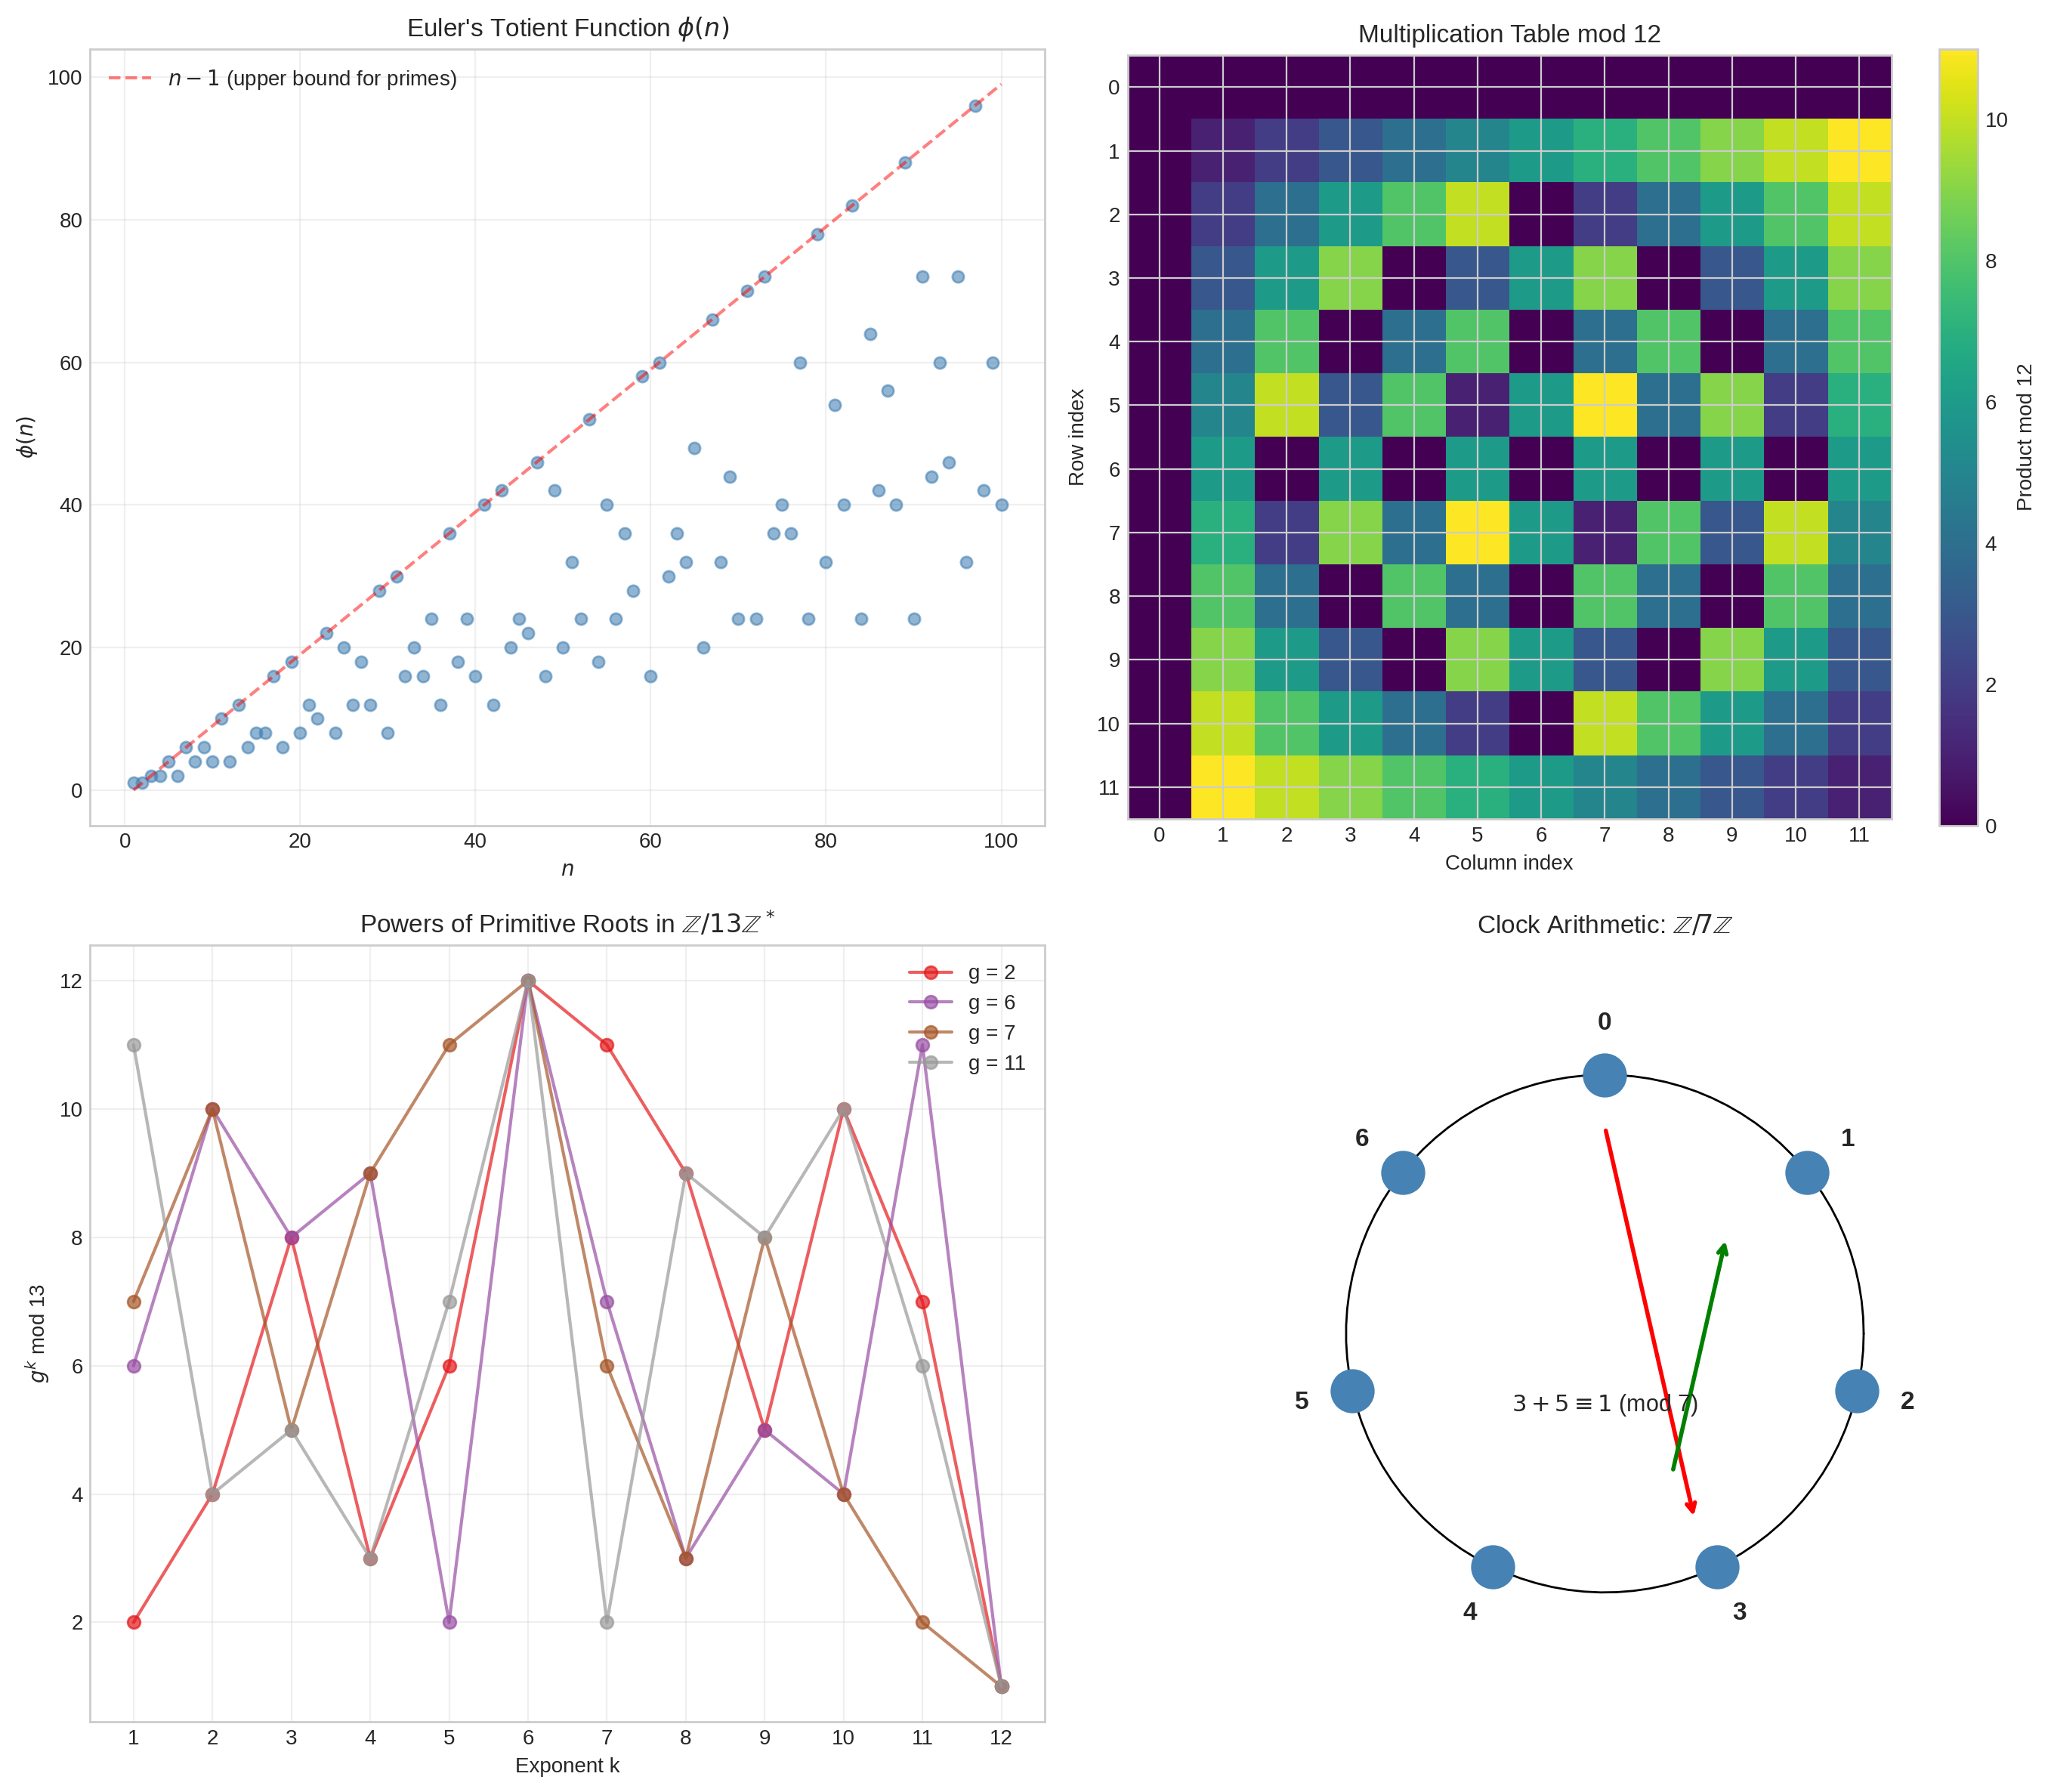


Visualization saved to plot.png


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Euler's Totient Function
ax1 = axes[0, 0]
n_values = np.arange(1, 101)
phi_values = [euler_totient(n) for n in n_values]

ax1.scatter(n_values, phi_values, c='steelblue', alpha=0.6, s=30)
ax1.plot(n_values, n_values - 1, 'r--', alpha=0.5, label=r'$n-1$ (upper bound for primes)')
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$\phi(n)$')
ax1.set_title(r"Euler's Totient Function $\phi(n)$")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Multiplication Table mod n
ax2 = axes[0, 1]
mod_n = 12
mult_table = np.zeros((mod_n, mod_n))
for i in range(mod_n):
    for j in range(mod_n):
        mult_table[i, j] = (i * j) % mod_n

im = ax2.imshow(mult_table, cmap='viridis', aspect='equal')
ax2.set_xlabel('Column index')
ax2.set_ylabel('Row index')
ax2.set_title(f'Multiplication Table mod {mod_n}')
plt.colorbar(im, ax=ax2, label='Product mod 12')
ax2.set_xticks(range(mod_n))
ax2.set_yticks(range(mod_n))

# Plot 3: Powers of generators in Z/p*
ax3 = axes[1, 0]
p = 13  # Prime modulus
generators = [2, 6, 7, 11]  # Primitive roots of 13
colors = plt.cm.Set1(np.linspace(0, 1, len(generators)))

for g, color in zip(generators, colors):
    powers = [mod_exp(g, k, p) for k in range(1, p)]
    ax3.plot(range(1, p), powers, 'o-', color=color, label=f'g = {g}', markersize=6, alpha=0.7)

ax3.set_xlabel('Exponent k')
ax3.set_ylabel(r'$g^k$ mod 13')
ax3.set_title(r'Powers of Primitive Roots in $\mathbb{Z}/13\mathbb{Z}^*$')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(1, p))

# Plot 4: Residue pattern visualization (clock arithmetic)
ax4 = axes[1, 1]
n_mod = 7
theta = np.linspace(0, 2*np.pi, 100)

# Draw the clock circle
ax4.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1)

# Place residue class markers
for i in range(n_mod):
    angle = np.pi/2 - 2*np.pi*i/n_mod
    x, y = np.cos(angle), np.sin(angle)
    ax4.plot(x, y, 'o', markersize=20, color='steelblue')
    ax4.text(x*1.2, y*1.2, str(i), ha='center', va='center', fontsize=12, fontweight='bold')

# Show addition: 3 + 5 = 1 (mod 7)
# Arrow from 0 to 3
start_angle = np.pi/2
end_angle = np.pi/2 - 2*np.pi*3/n_mod
ax4.annotate('', xy=(0.8*np.cos(end_angle), 0.8*np.sin(end_angle)),
             xytext=(0.8*np.cos(start_angle), 0.8*np.sin(start_angle)),
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Arrow from 3 to 3+5=1
start_angle = np.pi/2 - 2*np.pi*3/n_mod
end_angle = np.pi/2 - 2*np.pi*1/n_mod
ax4.annotate('', xy=(0.6*np.cos(end_angle), 0.6*np.sin(end_angle)),
             xytext=(0.6*np.cos(start_angle), 0.6*np.sin(start_angle)),
             arrowprops=dict(arrowstyle='->', color='green', lw=2))

ax4.text(0, -0.3, r'$3 + 5 \equiv 1$ (mod 7)', ha='center', fontsize=11)
ax4.set_xlim(-1.5, 1.5)
ax4.set_ylim(-1.5, 1.5)
ax4.set_aspect('equal')
ax4.axis('off')
ax4.set_title(r'Clock Arithmetic: $\mathbb{Z}/7\mathbb{Z}$')

plt.tight_layout()
plt.savefig('modular_arithmetic_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to plot.png")

## Applications

### RSA Encryption (Simplified)

A demonstration of the RSA algorithm using small primes.

In [7]:
# RSA with small primes (educational purposes only)
p, q = 61, 53
n = p * q
phi_n = (p - 1) * (q - 1)

# Choose public exponent
e = 17
assert gcd(e, phi_n) == 1, "e must be coprime to phi(n)"

# Compute private exponent
d = mod_inverse(e, phi_n)

print(f"RSA Key Generation:")
print(f"  p = {p}, q = {q}")
print(f"  n = {n}")
print(f"  phi(n) = {phi_n}")
print(f"  Public key: (e={e}, n={n})")
print(f"  Private key: d = {d}")

# Encrypt and decrypt a message
message = 42
ciphertext = mod_exp(message, e, n)
decrypted = mod_exp(ciphertext, d, n)

print(f"\nEncryption/Decryption:")
print(f"  Original message: {message}")
print(f"  Encrypted: {ciphertext}")
print(f"  Decrypted: {decrypted}")

RSA Key Generation:
  p = 61, q = 53
  n = 3233
  phi(n) = 3120
  Public key: (e=17, n=3233)
  Private key: d = 2753

Encryption/Decryption:
  Original message: 42
  Encrypted: 2557
  Decrypted: 42


## Summary

This notebook covered the fundamental concepts of modular arithmetic:

1. **Congruence relations** and residue classes
2. **Euler's totient function** $\phi(n)$ and its computation
3. **Fermat's Little Theorem** and **Euler's Theorem**
4. **Modular exponentiation** using binary exponentiation
5. **Modular multiplicative inverse** via the Extended Euclidean Algorithm
6. **Chinese Remainder Theorem** for solving systems of congruences
7. **Application to RSA cryptography**

Modular arithmetic provides the mathematical foundation for modern cryptographic systems and remains an active area of research in computational number theory.